In [51]:
#Імпорт необхідних бібліотек
import numpy as nmp
import pandas as pnd
from matplotlib import pyplot as ppl
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as clr

In [52]:
#Генерація випадкових данних
nmp.random.seed(0)
cnt = 130
features = 2
column = ['Feature - 1', 'Feature - 2', 'Condition']
dat = nmp.random.randint(10000, 100000, size=(cnt, features))
categ = nmp.random.choice([0, 1], size=(cnt, 1))
#Об'єднання числових та категорійних ознак, створення таблиці та збереження даних у csv файл
data = nmp.hstack((dat, categ))
datatable = pnd.DataFrame(data, columns=column)
datatable.to_csv('RandomData.csv', index=False)
#Завантаження даних з csv файлу і вивід перших п'яти рядків
datatabl = pnd.read_csv('RandomData.csv')
print(datatabl[:5])

   Feature - 1  Feature - 2  Condition
0        78268        53567          0
1        52613        55891          1
2        31243        51993          1
3        96293        65026          0
4        90471        90966          1


In [53]:
#Обробка пропущених значень і вибір ознак
datatabl = datatabl.dropna()
x = datatabl[['Feature - 1', 'Feature - 2']]
y = datatabl['Condition']
#Розділення данних на тренувальні і тестові
xtrain, xtest, ytrain, ytest =  tts(x, y, test_size=0.3, random_state=21)
#Дерево рішень
mtree = dtc()
mtree.fit(xtrain, ytrain)
lrtree = lr()
lrtree.fit(xtrain, ytrain)
predtree = lrtree.predict(xtest)


Mean Squared Error: 0.48717948717948717

Accuracy : 0.5128205128205128

Matrix of misclassified examples:
[[ 3 17]
 [ 2 17]]

Classification report:
              precision    recall  f1-score   support

           0       0.60      0.15      0.24        20
           1       0.50      0.89      0.64        19

    accuracy                           0.51        39
   macro avg       0.55      0.52      0.44        39
weighted avg       0.55      0.51      0.44        39



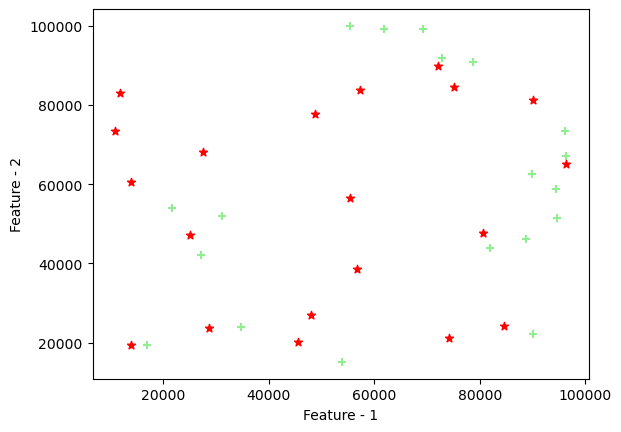

In [54]:
#Оцінка моделі -> середньо-квадратична помилка, точність і матриця неправильно класифікованих прикладів
msetree = mse(ytest, predtree)
print(f'\nMean Squared Error: {msetree}')
actree = acs(ytest, predtree)
print(f'\nAccuracy : {actree}')
matr = cm(ytest, predtree)
print('\nMatrix of misclassified examples:')
print(matr)
#Звіт про класифікацію
report = clr(ytest, predtree)
print('\nClassification report:')
print(report)
#Візуалізація розподілу кредитів за категоріями "одобрено" та "відхилено"
aprcat = xtest[ytest == 1]
rejcat = xtest[ytest == 0]
ppl.scatter(aprcat.iloc[:, 0], aprcat.iloc[:, 1], label='Approved', c='lightgreen', marker='+')
ppl.scatter(rejcat.iloc[:, 0], rejcat.iloc[:, 1], label='Rejected', c='red', marker='*')
ppl.xlabel('Feature - 1')
ppl.ylabel('Feature - 2')
ppl.title('')
ppl.show(close=None, block=None)